In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("winequality.csv")

In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Text(0, 0.5, 'sulphates')

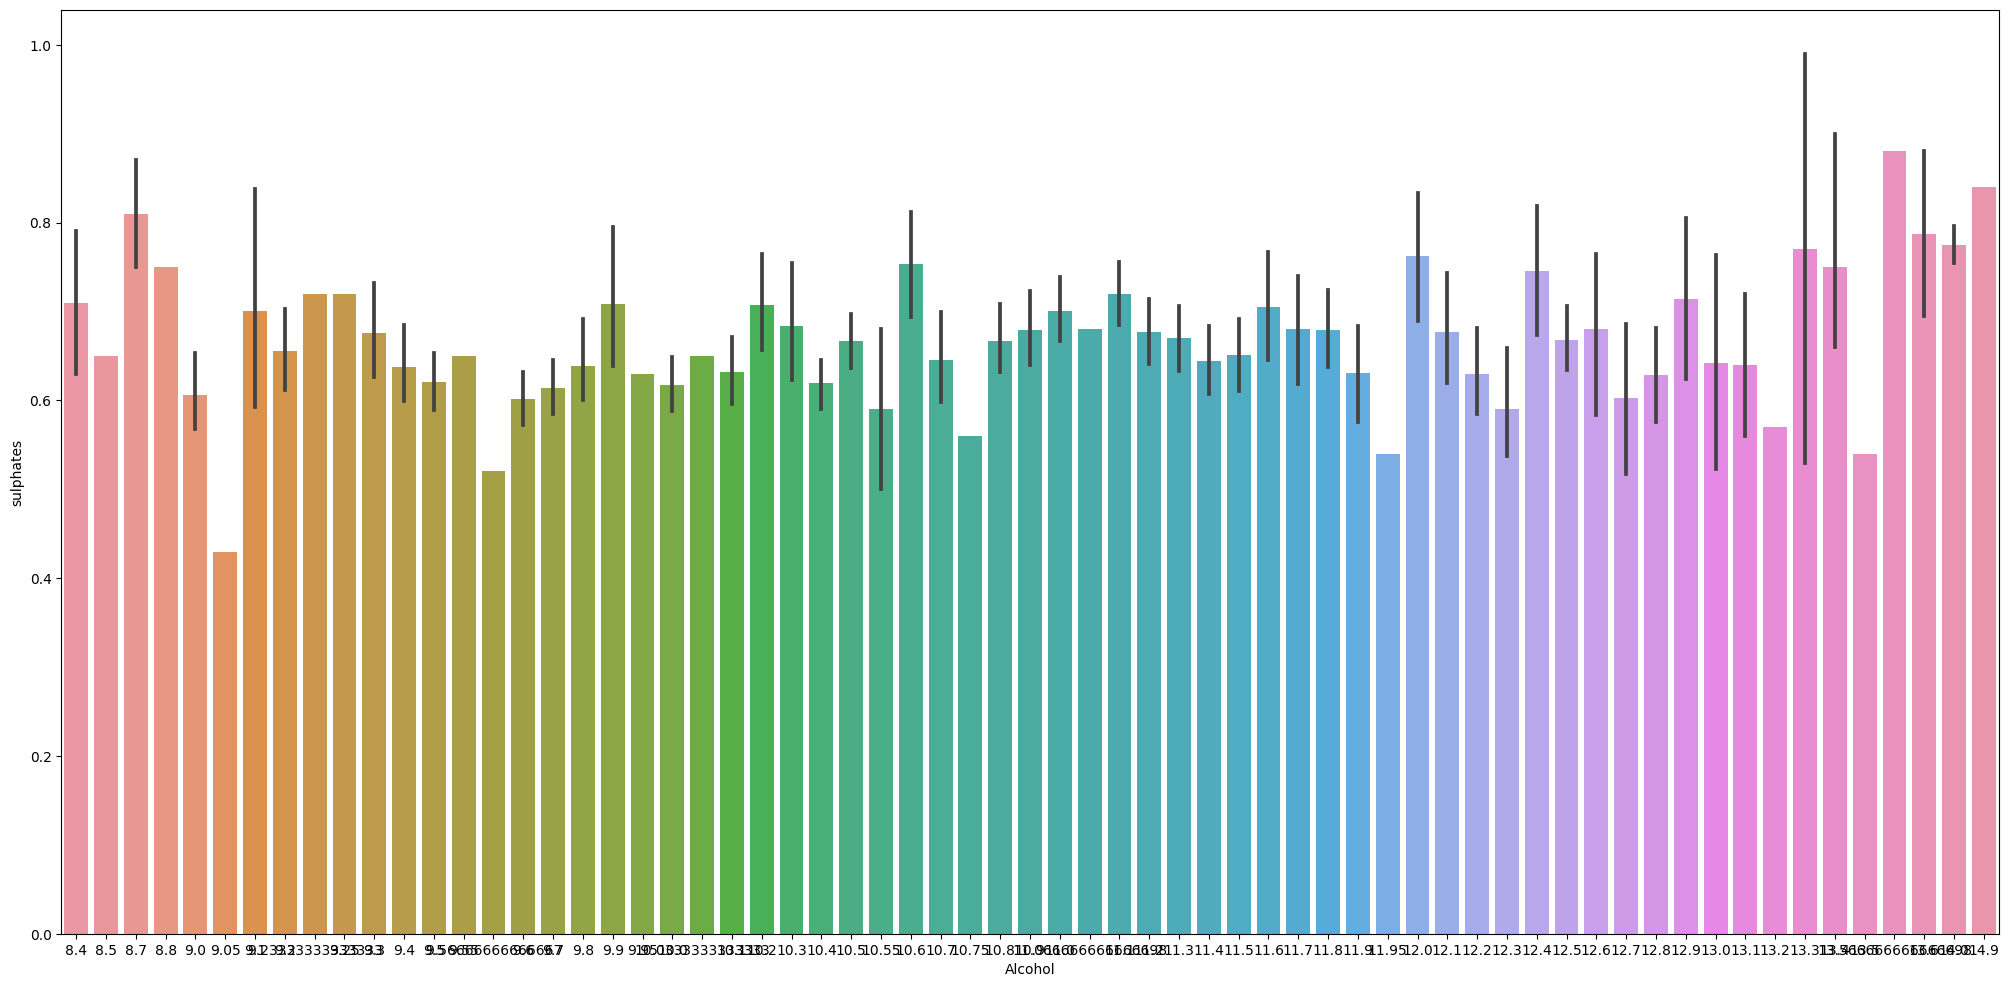

In [6]:
plt.figure(figsize=(25,12))
sns.barplot(x=dataset['alcohol'],y=dataset['sulphates'])
plt.xlabel('Alcohol')
plt.ylabel('sulphates')

In [7]:
alcohol_mean=dataset['alcohol'].mean()
print(alcohol_mean)
alcohol_median=dataset['alcohol'].median()
print(alcohol_median)

10.422983114446529
10.2


In [8]:
X=dataset.drop('quality',axis=1)
Y=dataset['quality']

<Axes: ylabel='total sulfur dioxide'>

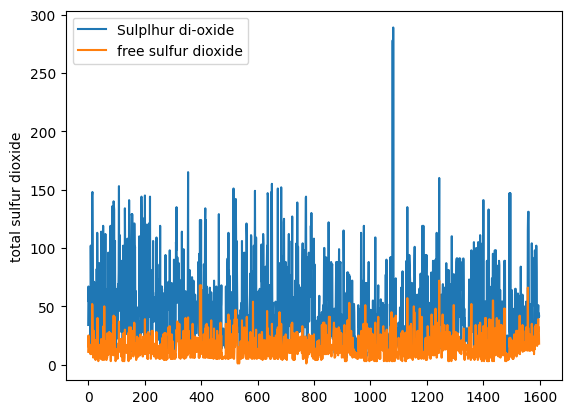

In [9]:
sns.lineplot(data=dataset['total sulfur dioxide'],label='Sulplhur di-oxide')
sns.lineplot(data=dataset['free sulfur dioxide'],label='free sulfur dioxide')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be plac

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

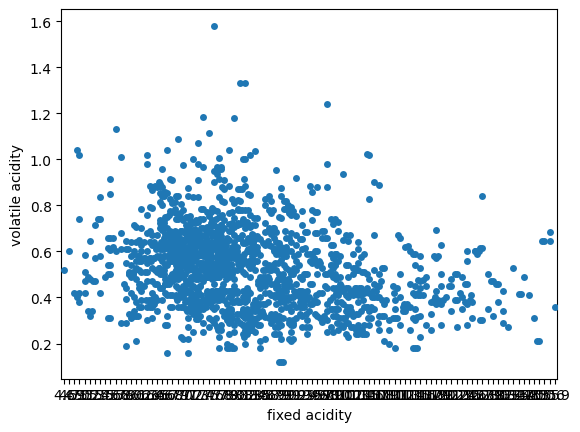

In [10]:
sns.swarmplot(x=dataset['fixed acidity'],y=dataset['volatile acidity'])

<ipython-input-11-da8d2a5bd321>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['density'],kde=True,bins=10)


<Axes: xlabel='density', ylabel='Density'>

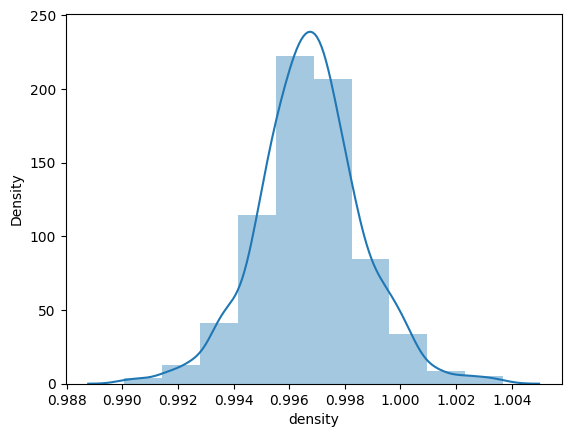

In [11]:
sns.distplot(dataset['density'],kde=True,bins=10)

<ipython-input-12-4313f1bc7c4a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['pH'],kde=True,color='green',bins=10)


<Axes: xlabel='pH', ylabel='Density'>

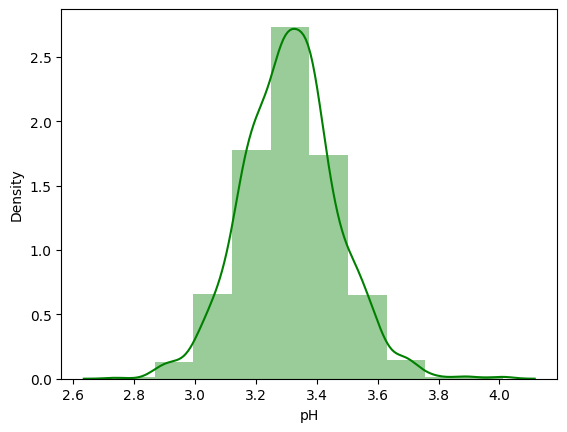

In [12]:
sns.distplot(dataset['pH'],kde=True,color='green',bins=10)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_predict=model.predict(x_test)

In [20]:
df = pd.DataFrame({'  Actual Quality ': y_test, '   Predicted Quality': y_predict})
df1 = df.head(25)
print(df1)

        Actual Quality      Predicted Quality
1300                  6              5.966715
975                   5              5.326034
12                    5              5.150777
1024                  7              5.664068
762                   6              5.374846
730                   5              5.010211
1320                  5              5.229420
1184                  5              5.327730
689                   5              5.723992
1063                  6              6.381711
225                   6              5.732813
1044                  6              6.259881
1498                  6              5.319586
1470                  5              5.403865
531                   5              5.777217
490                   6              5.463396
284                   5              5.462854
1198                  6              6.185485
211                   6              5.122987
475                   5              5.446799
1050                  5           

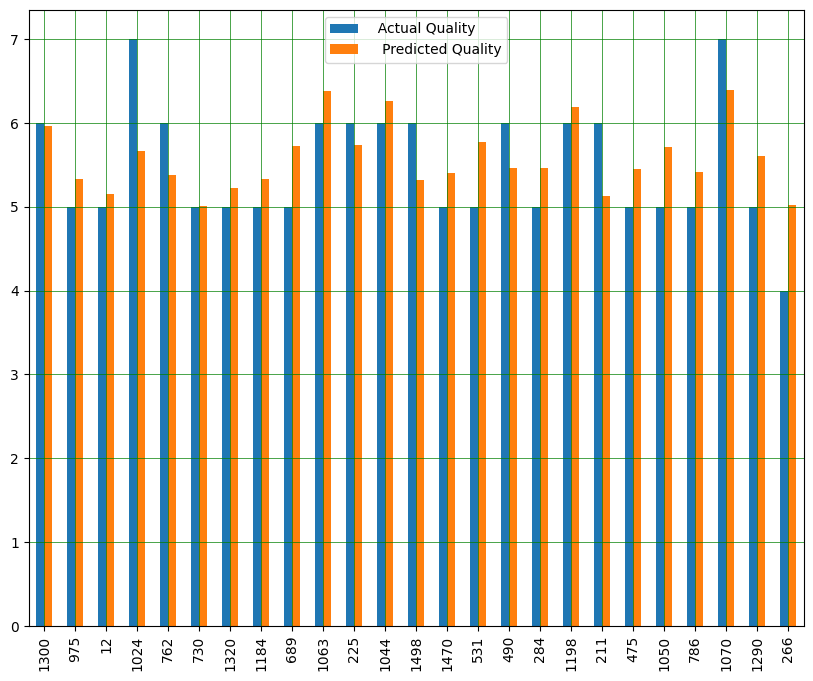

In [21]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
r2_score(y_test,y_predict)

0.35968725432492554

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.5085561738425157
Mean Squared Error: 0.4161032358222868
Root Mean Squared Error: 0.6450606450732262


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
model1 = LogisticRegression(solver='saga', multi_class='auto')
model1 = LogisticRegression()
model1.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#r2_score(y_test,y_predict)

In [37]:
pip install lightgbm

In [31]:
r2_score(y_test,y_predict)

0.35968725432492554

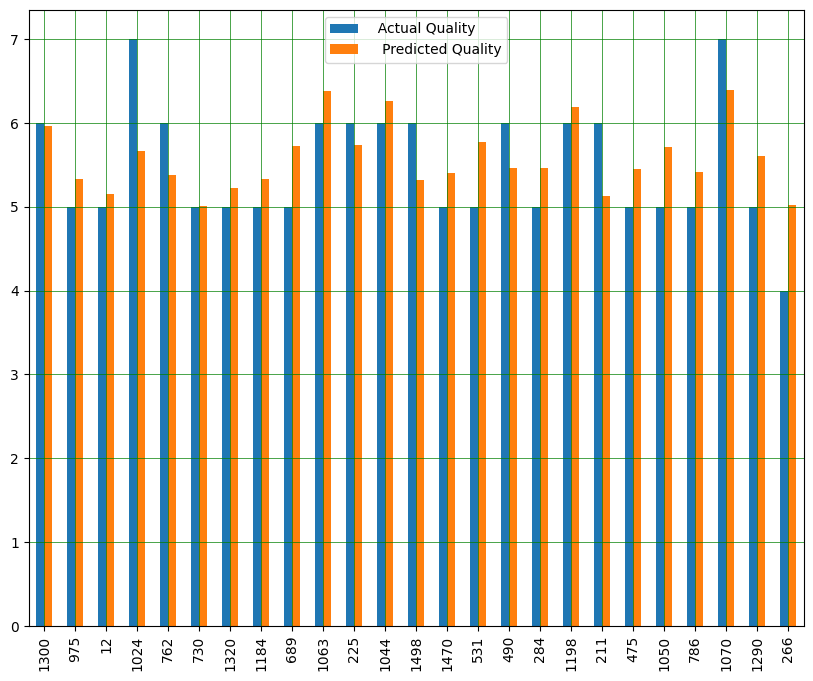

In [30]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()